<a href="https://colab.research.google.com/github/jmabry/projects-for-fun/blob/master/midlevel_answers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re
import seaborn as sns

# Is Peter a ?  We have a set of Peter Norvig's Strava data.  Let's find a few suspicous rides for closer inspection to see if Peter occasionally turns on his electric motor to juice his stats.

# Raw Data
We read in Peter's Strava data as a raw string

In [0]:
RAW_STRAVA = """Ride	Thu, 6/14/2012	Coyote Creek Century with Juliet	8:08:15	100.07 mi	1,513 ft		
Ride	Sat, 5/13/2017	Morgan Hill iCare Classic	7:27:21	100.05 mi	4,596 ft		
Ride	Sat, 5/12/2018	ICare Classic, Morgan Hill	6:47:46	91.29 mi	4,160 ft		
Ride	Sat, 5/6/2017	Wine Country Century	7:15:22	89.49 mi	5,246 ft		
Ride	Fri, 8/10/2018	Bike Ride Northwest Day 6	6:14:18	84.70 mi	4,380 ft		
Ride	Sat, 10/1/2016	Half Moon Bay overnight campout	7:30:38	80.07 mi	6,039 ft		
Ride	Tue, 8/7/2018	Bike Ride Northwest Day 3	6:10:39	78.96 mi	5,092 ft		
Ride	Sun, 6/15/2014	Sierra to the Sea Day 1	5:34:06	78.53 mi	4,777 ft		
Ride	Sat, 4/23/2016	Wildflower Century	5:36:10	77.22 mi	4,193 ft		
Ride	Mon, 6/16/2014	Sierra to the Sea Day 2	5:35:06	74.68 mi	2,451 ft		
Ride	Fri, 8/12/2016	Half Moon Bay / Harvey's 73/7300 Birthday Ride	6:44:14	74.35 mi	6,610 ft		
Ride	Wed, 10/14/2015	Half Moon Bay	6:07:55	72.97 mi	7,644 ft		
Ride	Fri, 1/27/2017	Morning Ride	5:16:50	70.07 mi	2,539 ft		
Ride	Tue, 6/17/2014	Sierra to the Sea Day 3	4:48:41	68.64 mi	825 ft		
Ride	Thu, 8/9/2018	Bike Ride Northwest Day 5	4:58:07	68.41 mi	3,862 ft		
Ride	Sat, 4/15/2017	Pescadero	6:13:12	68.34 mi	6,130 ft		
Ride	Sun, 6/4/2017	Sequoia Challenge	6:17:25	66.52 mi	7,520 ft		
Ride	Wed, 8/5/2015	08/05/2015 Palo Alto, CA	4:56:15	66.33 mi	2,054 ft		
Ride	Fri, 8/28/2015	Pescadaro via OLH	5:18:51	66.01 mi	6,137 ft		
Ride	Fri, 11/20/2015	Los Gatos	5:29:40	65.73 mi	5,380 ft		
Ride	Sun, 6/3/2018	The Sequoia	5:58:15	64.92 mi	6,677 ft		
Ride	Thu, 6/19/2014	Sierra to the Sea Day 5	4:32:55	63.69 mi	2,584 ft		
Ride	Mon, 8/3/2015	08/03/2015 Palo Alto, CA	4:45:09	63.61 mi	1,877 ft		
Ride	Fri, 6/10/2016	Morning Ride	4:21:38	62.84 mi	3,196 ft		
Ride	Sun, 6/2/2013	Woodside Loop and Baylands	4:27:42	62.14 mi	2,169 ft		
Ride	Wed, 6/12/2013	ride	4:39:46	61.39 mi	2,207 ft		
Ride	Sat, 4/18/2015	Tunitas + Lobitos Creeks	5:14:38	61.27 mi	6,611 ft		
Ride	Sat, 11/11/2017	Los Gatos / Bay Trail	4:26:24	60.74 mi	1,316 ft		
Ride	Sun, 4/17/2016	La Honda / Skyline	5:10:41	60.35 mi	4,551 ft		
Ride	Mon, 7/3/2017	Los Gatos / Bay Trail	4:25:41	60.28 mi	1,329 ft		
Ride	Sat, 4/16/2016	OLH - San Gregorio - Tunitas	4:57:40	60.12 mi	4,744 ft		
Ride	Sun, 1/29/2017	Los Gatos / Guadalupe / San Tomas / Bay Trails	4:33:38	60.11 mi	1,447 ft		
Ride	Mon, 11/26/2018	Lunch Ride Los Gatos	4:21:35	60.03 mi	1,070 ft		
Ride	Sat, 10/31/2015	Saratoga Ramble	5:01:57	59.10 mi	3,528 ft		
Ride	Sat, 8/18/2018	Tour de Menlo	4:03:48	58.81 mi	2,467 ft		
Ride	Sat, 4/26/2014	OLH - Tunitas Creek	5:15:26	58.69 mi	6,742 ft		
Ride	Sat, 6/15/2013	Palo Alto to Santa Cruz	4:27:54	58.42 mi	4,431 ft		
Ride	Sat, 10/11/2014	OLH / La Honda / Tunitas	5:05:23	58.29 mi	6,044 ft		
Ride	Sat, 7/9/2016	Lunch Ride	3:50:23	58.23 mi	4,042 ft		
Ride	Wed, 6/18/2014	Sierra to the Sea Day 4	4:57:53	57.64 mi	5,561 ft	
Ride	Tue, 7/7/2015	07/07/2015 Palo Alto, CA	4:13:20	57.60 mi	1,280 ft		
Ride	Mon, 8/6/2018	Bike Ride Northwest Day 2	4:35:48	57.58 mi	4,514 ft		
Ride	Fri, 6/20/2014	Sierra to the Sea Day 6	4:33:39	56.91 mi	4,453 ft		
Ride	Sat, 6/10/2017	Los Gatos / Creek Trails	3:50:24	56.28 mi	1,365 ft		
Ride	Sat, 3/4/2017	Lunch Ride	3:58:25	56.26 mi	1,378 ft		
Ride	Sun, 8/5/2018	Bike Ride Northwest Day 1	3:34:42	55.77 mi	1,824 ft		
Ride	Sat, 8/13/2016	Petaluma - Point Reyes	4:30:12	54.75 mi	5,286 ft		
Ride	Sun, 6/7/2015	Tour de Cure	3:59:47	54.65 mi	2,748 ft		
Ride	Wed, 12/16/2015	Los Gatos	4:00:41	53.86 mi	2,595 ft		
Ride	Fri, 6/2/2017	Morning Ride	3:57:45	53.49 mi	1,375 ft		
Ride	Sun, 6/8/2014	Tour de Cure 75K	4:03:05	53.10 mi	2,596 ft		
Ride	Sun, 11/6/2016	Los Gatos	3:38:28	52.49 mi	1,263 ft		
Ride	Fri, 2/10/2017	Morning Ride	3:52:39	52.02 mi	1,739 ft		
Ride	Sat, 2/23/2019	Crystal Springs Dam	4:02:11	51.93 mi	1,946 ft		
Ride	Fri, 8/11/2017	Saratoga with Peter H	4:30:31	51.74 mi	2,871 ft		
Ride	Sat, 2/4/2017	Canada Rd	3:46:34	51.66 mi	1,762 ft		
Ride	Sun, 6/9/2013	Silicon Valley Tour de Cure 75K	3:58:37	51.63 mi	2,929 ft		
Ride	Sun, 9/3/2017	Morning Ride	4:22:45	51.31 mi	2,526 ft		
Ride	Mon, 7/27/2015	Palo Alto Cycling	3:48:23	50.93 mi	1,306 ft		
Ride	Wed, 7/29/2015	07/29/2015 Palo Alto, CA	3:47:53	50.92 mi	1,873 ft	
Ride	Sun, 6/26/2016	Afternoon Ride	3:16:33	50.78 mi	1,181 ft		
Ride	Mon, 8/10/2015	08/10/2015 Palo Alto, CA	3:41:54	50.73 mi	1,325 ft		
Ride	Sat, 10/15/2016	Los Gatos	3:28:16	50.64 mi	1,368 ft		
Ride	Tue, 12/19/2017	Los Gatos	3:46:37	50.49 mi	1,929 ft		
Ride	Fri, 6/28/2013	Kaffeehaus San Mateo	3:38:11	50.38 mi	1,028 ft		
Ride	Thu, 10/5/2017	Big Sur	4:33:33	50.38 mi	4,528 ft		
Ride	Sun, 11/20/2016	Lunch Ride	3:32:01	50.13 mi	1,847 ft		
Ride	Sat, 1/13/2018	Canada to Coyote Point	3:59:24	50.09 mi	1,499 ft		
Ride	Fri, 1/13/2017	Los Gatos Creek	3:52:28	50.01 mi	1,598 ft		
Ride	Sun, 6/11/2017	Tour de Cure with Juliet	4:11:01	49.49 mi	2,713 ft		
Ride	Sun, 9/11/2016	Santa Cruz via Mountain Charlie Rd	4:03:04	48.78 mi	3,300 ft		
Ride	Sat, 7/23/2016	Morning Ride	3:30:50	48.45 mi	1,063 ft		
Ride	Fri, 3/25/2016	Morning Ride	3:39:53	47.93 mi	2,438 ft		
Ride	Sat, 8/20/2016	Tour de Menlo with Juliet	3:30:24	47.52 mi	2,133 ft		
Ride	Sat, 8/15/2015	08/15/2015 Palo Alto, CA	3:35:03	47.12 mi	1,158 ft		
Ride	Wed, 11/11/2015	Morning Ride	3:45:01	46.54 mi	2,559 ft		
Ride	Fri, 7/21/2017	Morning Ride	3:35:00	46.19 mi	748 ft		
Ride	Sat, 9/2/2017	Canada / Sheep Camp Trail	3:45:45	45.72 mi	2,034 ft		
Ride	Mon, 1/19/2015	Canada Rd, etc.	2:57:14	45.64 mi	1,836 ft		
Ride	Sun, 11/27/2016	Morning Ride	3:04:11	45.60 mi	1,378 ft	
Ride	Sun, 7/2/2017	Afternoon Ride	3:10:38	45.30 mi	581 ft		
Ride	Sat, 10/3/2015	Los Gatos	2:59:26	45.21 mi	1,148 ft		
Ride	Sat, 7/2/2016	Morning Ride	3:23:20	45.21 mi	1,991 ft		
Ride	Mon, 1/16/2017	Morning Ride	3:34:28	45.15 mi	1,434 ft		
Ride	Sun, 1/15/2017	Lunch Ride	3:18:47	45.12 mi	1,873 ft		
Ride	Sun, 4/9/2017	Lunch Ride	3:10:28	44.76 mi	636 ft		
Ride	Sun, 10/15/2017	Los Gatos	2:51:53	44.71 mi	1,437 ft		
Ride	Tue, 10/8/2013	work	3:22:55	44.58 mi	961 ft		
Ride	Thu, 7/16/2015	07/16/2015 Mountain View, California	3:29:45	44.34 mi	1,339 ft		
Ride	Sat, 10/28/2017	Mindego Ridge Winery	4:17:45	44.28 mi	4,331 ft		
Ride	Sun, 9/2/2018	Saratoga	3:31:02	44.04 mi	1,900 ft		
Ride	Fri, 9/23/2016	Los Gatos	2:53:22	43.93 mi	1,339 ft		
Ride	Sat, 7/25/2015	07/25/2015 Palo Alto, California	4:02:27	43.62 mi	4,819 ft		
Ride	Sat, 7/8/2017	Dumbarton / Niles	3:14:55	43.54 mi	627 ft		
Ride	Sat, 6/9/2018	Kings Mountain	3:41:47	43.47 mi	3,543 ft		
Ride	Fri, 3/10/2017	Morning Ride	4:13:51	43.22 mi	4,554 ft		
Ride	Sat, 3/26/2016	Morning Ride	3:36:57	43.18 mi	3,173 ft		
Ride	Sun, 10/18/2015	Afternoon Ride	3:00:02	43.04 mi	2,323 ft		
Ride	Sat, 9/20/2014	Kings Mountain	3:26:36	43.00 mi	3,299 ft		
Ride	Sat, 8/11/2018	Bike Ride Northwest Day 7	3:25:20	42.39 mi	2,241 ft	
Ride	Sat, 3/18/2017	Morning Ride	3:37:01	42.29 mi	2,231 ft		
Ride	Sat, 7/11/2015	07/11/2015 Walnut Creek, California	3:09:38	42.29 mi	3,284 ft		
Ride	Thu, 1/22/2015	OLH, etc.	3:25:09	42.15 mi	2,957 ft		
Ride	Sun, 11/9/2014	11/09/2014 Palo Alto, CA	3:24:57	42.10 mi	3,096 ft		
Ride	Sun, 5/15/2016	Afternoon Ride	2:55:51	41.98 mi	1,693 ft		
Ride	Sat, 3/25/2017	Morning Ride	3:37:45	41.94 mi	2,874 ft		
Ride	Sun, 6/14/2015	06/14/2015 Palo Alto, CA	2:46:38	41.67 mi	1,086 ft		
Ride	Sat, 7/28/2018	Coyote Hills / Dumbarton	3:25:39	41.66 mi	1,463 ft		
Ride	Sun, 8/7/2016	Afternoon Ride	2:42:58	41.19 mi	1,526 ft		
Ride	Sat, 2/11/2017	Morning Ride	3:19:34	41.16 mi	2,172 ft		
Ride	Sun, 12/3/2017	Bay Trail	2:53:58	40.86 mi	568 ft		
Ride	Mon, 5/29/2017	Morning Ride	3:52:04	40.83 mi	3,678 ft		
Ride	Sat, 2/18/2017	Lunch Ride	3:01:13	40.82 mi	630 ft		
Ride	Wed, 11/9/2016	Lunch Ride	2:52:06	40.82 mi	1,667 ft		
Ride	Sat, 5/20/2017	Lunch Ride	3:07:43	40.82 mi	709 ft		
Ride	Sat, 3/24/2018	Morning Ride	2:56:29	40.69 mi	561 ft		
Ride	Sun, 11/19/2017	Belmont / Bay Trail	2:53:36	40.60 mi	453 ft		
Ride	Sun, 3/26/2017	Lunch Ride	2:54:38	40.57 mi	518 ft		
Ride	Sat, 5/25/2019	Crestview	3:17:16	40.56 mi	2,890 ft		
Ride	Sat, 9/16/2017	Tour de Coop	3:24:53	40.55 mi	1,125 ft	
Ride	Thu, 9/3/2015	Morning Ride	3:02:58	40.40 mi	1,181 ft		
Ride	Sun, 2/5/2017	Morning Ride	2:53:48	40.40 mi	1,608 ft		
Ride	Sun, 10/23/2016	Lunch Ride	2:41:33	40.33 mi	1,699 ft		
Ride	Sat, 12/8/2018	Morning Ride	3:27:10	40.33 mi	2,300 ft		
Ride	Sun, 2/12/2017	Lunch Ride	3:39:38	40.27 mi	2,717 ft		
Ride	Sat, 12/2/2017	Dumbarton / Niles	2:57:48	40.26 mi	610 ft		
Ride	Sun, 11/12/2017	Morning Ride	2:54:57	40.24 mi	656 ft		
Ride	Sat, 11/15/2014	Kings Mountain again	3:25:14	40.18 mi	2,952 ft		
Ride	Sun, 10/9/2016	Lunch Ride	2:41:06	40.14 mi	1,106 ft		
Ride	Mon, 11/6/2017	Morning Ride	2:48:12	40.13 mi	509 ft		
Ride	Sat, 12/17/2016	Morning Ride	3:11:31	40.10 mi	2,133 ft		
Ride	Fri, 1/12/2018	Morning Ride	2:58:30	40.09 mi	427 ft		
Ride	Sun, 12/18/2016	Morning Ride	3:04:01	40.03 mi	1,886 ft		
Ride	Sat, 6/11/2016	Ring of Fire (Partial; Garmin troubles)	3:00:00	40.00 mi	0 ft		
Ride	Sun, 1/25/2015	Canada Rd	2:45:51	39.99 mi	1,772 ft		
Ride	Sat, 6/21/2014	Sierra to the Sea Day 7	3:36:53	39.77 mi	3,325 ft		
Ride	Sat, 9/23/2017	Canada / Crestview	3:25:13	39.77 mi	2,444 ft		
Ride	Fri, 12/27/2013	OLH to Page Mill	3:24:14	39.73 mi	3,365 ft		
Ride	Sat, 4/30/2016	Ridge to Bridge MTB	5:40:57	39.67 mi	5,377 ft		
Ride	Fri, 10/30/2015	OLH - West Alpine	3:28:46	39.51 mi	4,505 ft	
Ride	Sat, 9/5/2015	Ring of Fire	3:31:55	39.18 mi	3,553 ft		
Ride	Wed, 8/28/2013	Train Track Crash	2:50:55	39.16 mi	928 ft		
Ride	Sun, 2/22/2015	Canada Rd Plus	2:57:25	39.14 mi	1,834 ft		
Ride	Sat, 4/8/2017	Lunch Ride	3:28:52	39.09 mi	3,117 ft		
Ride	Sat, 11/14/2015	Morning Ride	3:09:31	39.00 mi	2,254 ft		
Ride	Sun, 3/1/2015	Canada Rd	2:38:11	38.81 mi	1,856 ft		
Ride	Wed, 11/22/2017	Morning Ride	2:55:22	38.77 mi	892 ft		
Ride	Sat, 10/29/2016	Morning Ride	3:14:22	38.72 mi	2,201 ft		
Ride	Sat, 4/6/2019	Coyote Hills / Dumbarton	2:50:52	38.71 mi	650 ft		
Ride	Wed, 7/22/2015	07/22/2015 Palo Alto, CA	2:55:45	38.68 mi	627 ft		
Ride	Mon, 6/22/2015	06/22/2015 Palo Alto, CA	2:51:10	38.55 mi	725 ft		
Ride	Fri, 12/16/2016	Morning Ride	2:54:02	38.46 mi	1,053 ft		
Ride	Sun, 10/7/2018	Westridge, Canada with Ted	3:09:25	38.29 mi	1,667 ft		
Ride	Sat, 2/21/2015	Kings Mountain	3:13:05	38.21 mi	3,015 ft		
Ride	Sat, 9/12/2015	Morning Ride	3:06:03	38.20 mi	3,342 ft		
Ride	Sun, 2/15/2015	Canada Rd	2:35:29	38.06 mi	1,470 ft		
Ride	Sun, 11/16/2014	Canada Rd	2:30:41	37.88 mi	1,548 ft		
Ride	Sun, 10/5/2014	Canada Road Sunday	2:39:39	37.84 mi	1,644 ft		
Ride	Mon, 11/23/2015	Home from Pigeon Point	3:29:29	37.70 mi	3,133 ft		
Ride	Sat, 1/6/2018	Morning Ride	2:53:45	37.66 mi	1,503 ft	
Ride	Sun, 1/7/2018	Dumbarton / Niles	2:39:17	37.64 mi	472 ft		
Ride	Sun, 12/1/2013	Mt Hamilton	3:47:01	37.56 mi	4,921 ft		
Ride	Sun, 3/18/2018	Lunch Ride	2:47:48	37.52 mi	827 ft		
Ride	Sat, 9/22/2018	Morning Ride	2:52:01	37.45 mi	1,798 ft		
Ride	Sun, 10/22/2017	Afternoon Ride	2:33:27	37.41 mi	1,024 ft		
Ride	Sun, 5/4/2014	MTV-Woodside	2:41:21	37.41 mi	1,495 ft		
Ride	Sat, 1/23/2016	Morning Ride	3:39:10	37.35 mi	2,949 ft		
Ride	Sun, 9/16/2018	Dumbarton / Niles	2:38:41	37.26 mi	722 ft		
Ride	Sun, 6/10/2018	Canada / Emerald Hills	3:21:31	37.26 mi	2,621 ft		
Ride	Mon, 5/4/2015	Commute	2:43:06	37.25 mi	189 ft		
Ride	Sat, 7/7/2018	Runymede Trail	3:01:51	37.07 mi	1,834 ft		
Ride	Sun, 12/11/2016	Afternoon Ride	2:34:13	37.05 mi	1,463 ft		
Ride	Sun, 11/29/2015	Mt Hamilton	3:40:48	37.00 mi	4,902 ft		
Ride	Sat, 1/30/2016	Morning Ride	2:31:37	36.88 mi	1,345 ft		
Ride	Mon, 2/18/2019	Niles	2:39:39	36.83 mi	571 ft		
Ride	Sun, 1/21/2018	Alviso	2:35:58	36.82 mi	404 ft		
Ride	Sat, 8/26/2017	Lunch Ride	2:41:49	36.71 mi	1,115 ft		
Ride	Sat, 9/13/2014	Emerald Hills	2:55:30	36.71 mi	2,143 ft		
Ride	Sun, 5/22/2016	Lunch Ride	2:12:20	36.68 mi	1,332 ft		
Ride	Sat, 11/25/2017	Mt. Hamilton	3:41:22	36.65 mi	4,806 ft	
Ride	Fri, 10/13/2017	Voyage	2:46:15	36.63 mi	505 ft		
Ride	Tue, 5/12/2015	05/12/2015 Palo Alto, CA	2:47:15	36.54 mi	499 ft		
Ride	Mon, 4/20/2015	Commute	2:57:44	36.31 mi	119 ft		
Ride	Fri, 5/13/2016	Morning Ride	2:41:03	36.21 mi	456 ft		
Ride	Sat, 12/3/2016	Morning Ride	3:08:37	36.20 mi	2,881 ft		
Ride	Sun, 12/7/2014	12/07/2014 Palo Alto, CA	2:43:35	36.16 mi	1,569 ft		
Ride	Sun, 9/30/2018	Canada	2:48:41	36.12 mi	1,480 ft		
Ride	Fri, 3/30/2018	Morning Ride	2:38:07	36.11 mi	285 ft		
Ride	Sun, 11/5/2017	Lunch Ride	3:24:01	35.91 mi	2,231 ft		
Ride	Sun, 2/8/2015	Commute	2:28:46	35.85 mi	1,142 ft		
Ride	Tue, 6/26/2018	Return from Chabot Lake with Juliet MTB	3:21:30	35.81 mi	817 ft		
Ride	Sat, 3/30/2019	Morning Ride	3:23:55	35.78 mi	2,861 ft		
Ride	Sun, 11/22/2015	Pigeon Point	3:14:41	35.73 mi	3,230 ft		
Ride	Mon, 9/19/2016	Sunnyvale	2:37:04	35.68 mi	745 ft		
Ride	Thu, 4/9/2015	Palo Alto Cycling	2:35:47	35.51 mi	117 ft		
Ride	Sun, 8/21/2016	Canada	2:20:21	35.42 mi	1,348 ft		
Ride	Tue, 10/28/2014	Woodside	2:36:36	35.39 mi	1,560 ft		
Ride	Sun, 1/27/2019	Crystal Springs Dam Bridge	2:28:21	35.38 mi	1,480 ft		
Ride	Thu, 4/26/2018	San Mateo	2:38:26	35.31 mi	666 ft		
Ride	Thu, 12/22/2016	Half Moon Bay	2:53:00	35.26 mi	2,671 ft	
Ride	Tue, 6/7/2016	Los Altos	2:41:13	35.18 mi	1,070 ft		
Ride	Sat, 3/15/2014	Canada - Steve	2:51:50	35.01 mi	1,607 ft		
Ride	Sun, 12/6/2015	Canada Rd	2:15:05	34.67 mi	1,237 ft		
Ride	Wed, 9/13/2017	Healdburg / Jimtown	2:08:03	34.45 mi	912 ft		
Ride	Thu, 10/2/2014	10/02/2014 Mountain View, California	3:08:06	34.28 mi	2,864 ft		
Ride	Sat, 2/1/2014	OLH to Page Mill	3:07:43	34.26 mi	3,099 ft		
Ride	Sat, 10/21/2017	Pescadero	5:20:08	67.05 mi	4,938 ft		
Ride	Sat, 7/30/2016	Morning Ride	2:50:15	34.19 mi	2,799 ft		
Ride	Mon, 7/10/2017	Morning Ride	2:38:59	34.18 mi	984 ft		
Ride	Thu, 7/31/2014	Work commute	2:36:53	34.15 mi	564 ft		
Ride	Sat, 12/15/2018	Lunch Ride	2:50:19	34.10 mi	1,683 ft		
Ride	Sat, 1/20/2018	Afternoon Ride	2:28:18	34.02 mi	525 ft		
Ride	Sun, 12/4/2016	Morning Ride	2:29:29	34.00 mi	1,161 ft		
Ride	Sat, 10/8/2016	Lunch Ride	2:25:17	33.95 mi	1,375 ft		
Ride	Thu, 10/16/2014	Commute	2:40:01	33.76 mi	615 ft		
Ride	Fri, 11/11/2016	OLH	2:44:59	33.69 mi	2,175 ft		
Ride	Sat, 9/3/2016	Morning Ride	3:07:28	33.65 mi	2,792 ft		
Ride	Sun, 4/19/2015	Canada Rd	2:23:17	33.56 mi	1,466 ft		
Ride	Sat, 8/12/2017	Afternoon Ride	2:41:24	33.54 mi	633 ft		
Ride	Sat, 2/14/2015	Rancho San Antonio	2:45:23	33.53 mi	2,075 ft	
Ride	Sat, 2/27/2016	Morning Ride	2:47:15	33.51 mi	2,005 ft		
Ride	Sun, 9/17/2017	Canada and off road	2:36:04	33.50 mi	1,772 ft		
Ride	Sat, 2/24/2018	Los Altos Hills on and off road	3:10:47	33.49 mi	2,343 ft		
Ride	Sun, 1/26/2014	Canada Rd	2:05:59	33.12 mi	1,446 ft		
Ride	Sat, 4/27/2019	Morning Ride	2:31:48	33.04 mi	1,722 ft		
Ride	Sun, 5/12/2019	Peninsula Bike Trail to Bay Trail	2:29:05	33.00 mi	846 ft		
Ride	Sun, 8/20/2017	Lunch Ride	2:23:02	32.96 mi	1,407 ft		
Ride	Sun, 3/6/2016	Lunch Ride	2:57:54	32.86 mi	2,566 ft		
Ride	Sun, 3/5/2017	Lunch Ride	2:57:09	32.82 mi	1,713 ft		
Ride	Sat, 12/16/2017	Morning Ride	2:48:58	32.72 mi	2,320 ft		
Ride	Tue, 8/23/2016	Morning Ride	2:32:15	32.61 mi	354 ft		
Ride	Fri, 12/9/2016	Morning Ride	3:04:52	32.55 mi	2,365 ft		
Ride	Sun, 11/1/2015	Lunch Ride	2:20:35	32.49 mi	1,553 ft		
Ride	Sat, 4/14/2018	Lunch Ride	2:21:49	32.43 mi	666 ft		
Ride	Fri, 1/26/2018	Morning Ride	2:23:38	32.41 mi	295 ft		
Ride	Sun, 8/16/2015	08/16/2015 Palo Alto, CA	2:29:53	32.40 mi	1,650 ft		
Ride	Sat, 5/9/2015	OLH	2:30:17	32.33 mi	2,788 ft		
Ride	Wed, 1/31/2018	Morning Ride	3:04:15	32.28 mi	2,526 ft		
Ride	Sat, 4/4/2015	Rancho San Antonio	2:55:37	32.26 mi	2,136 ft	
Ride	Sat, 3/16/2019	Morning Ride	2:58:43	32.26 mi	2,316 ft		
Ride	Sun, 12/27/2015	Canada Rd with Juliet	2:24:56	32.22 mi	1,491 ft		
Ride	Mon, 5/18/2015	05/18/2015 Palo Alto, CA	2:24:45	32.22 mi	807 ft		
Ride	Sun, 4/8/2018	Lunch Ride	2:21:54	32.18 mi	1,296 ft		
Ride	Sun, 5/3/2015	Canada Rd	2:12:24	32.02 mi	1,384 ft		
Ride	Wed, 6/17/2015	06/17/2015 Mountain View, California	2:13:42	32.01 mi	650 ft		
Ride	Sat, 11/7/2015	Crystal Springs Part 1	2:15:00	32.00 mi	0 ft		
Ride	Sun, 8/23/2015	Afternoon Ride	2:24:29	31.90 mi	2,444 ft		
Ride	Sun, 4/12/2015	Palo Alto Cycling	2:01:49	31.76 mi	1,210 ft		
Ride	Sun, 11/13/2016	Afternoon Ride	2:23:46	31.71 mi	1,273 ft		
Ride	Fri, 10/7/2016	Morning Ride	2:26:46	31.65 mi	2,382 ft		
Ride	Thu, 8/15/2013	08/15/2013 Palo Alto, CA	2:19:27	31.64 mi	555 ft		
Ride	Wed, 10/30/2013	work	2:22:00	31.55 mi	995 ft		
Ride	Sun, 9/18/2016	Morning Ride	2:20:46	31.48 mi	1,506 ft		
Ride	Tue, 6/18/2013	work etc (headwinds)	2:03:34	31.48 mi	809 ft		
Ride	Sun, 3/11/2018	Lunch Ride	2:23:14	31.42 mi	686 ft		
Ride	Sat, 3/12/2016	Lunch Ride	2:10:01	31.39 mi	1,198 ft		
Ride	Sun, 1/22/2017	Dumbarton	2:23:36	31.27 mi	591 ft		
Ride	Sat, 9/29/2018	Kings	2:36:47	31.23 mi	1,949 ft		
Ride	Sat, 3/23/2019	Morning Ride	2:33:27	31.19 mi	1,529 ft	
Ride	Sat, 4/13/2019	Alviso	2:10:04	31.18 mi	397 ft		
Ride	Mon, 11/10/2014	Commute	2:22:39	31.18 mi	800 ft		
Ride	Mon, 5/25/2015	05/25/2015 Palo Alto, CA	2:19:26	31.14 mi	1,591 ft		
Ride	Mon, 2/16/2015	Portola Valley Loop	2:09:15	31.11 mi	1,283 ft		
Ride	Wed, 9/21/2016	Morning Ride	2:16:04	31.09 mi	551 ft		
Ride	Sat, 3/11/2017	Afternoon Ride	2:19:05	31.04 mi	1,368 ft		
Ride	Sun, 7/29/2018	Lunch Ride	2:26:56	30.92 mi	1,578 ft		
Ride	Fri, 11/10/2017	Lunch Ride	2:20:46	30.92 mi	312 ft		
Ride	Mon, 6/12/2017	Morning Ride	2:20:16	30.90 mi	554 ft		
Ride	Thu, 12/29/2016	Morning Ride	2:13:46	30.86 mi	1,083 ft		
Ride	Sat, 4/22/2017	Lunch Ride	2:21:31	30.80 mi	1,237 ft		
Ride	Mon, 9/7/2015	Healdsburg	2:09:43	30.76 mi	1,037 ft		
Ride	Sat, 1/14/2017	Afternoon Ride	2:12:37	30.71 mi	466 ft		
Ride	Mon, 9/4/2017	Kings Mountain	2:40:57	30.69 mi	2,431 ft		
Ride	Sun, 8/9/2015	08/09/2015 Palo Alto, CA	2:15:39	30.66 mi	1,348 ft		
Ride	Sat, 12/12/2015	Lunch Ride	2:16:20	30.56 mi	1,434 ft		
Ride	Thu, 12/28/2017	Morning Ride	2:17:38	30.54 mi	430 ft		
Ride	Mon, 1/30/2017	Morning Ride	2:19:47	30.49 mi	696 ft		
Ride	Sun, 8/27/2017	Lunch Ride	2:16:36	30.47 mi	774 ft		
Ride	Fri, 10/12/2018	Lunch Ride	2:16:25	30.44 mi	348 ft	
Ride	Mon, 6/25/2018	Chabot Lake Overnight Bike packing with Juliet MTB	3:02:49	30.41 mi	1,250 ft		
Ride	Sat, 2/28/2015	Palo Alto Cycling	2:40:24	30.37 mi	2,535 ft		
Ride	Sat, 6/24/2017	Afternoon Ride	2:06:05	30.31 mi	338 ft		
Ride	Tue, 6/2/2015	06/02/2015 Mountain View, California	2:09:58	30.30 mi	784 ft		
Ride	Mon, 5/27/2019	Canada / Sheep camp / Water dog lake	2:37:11	30.27 mi	1,444 ft		
Ride	Sat, 1/2/2016	Los Altos Hills	2:29:48	30.27 mi	1,952 ft		
Ride	Fri, 6/23/2017	Morning Ride	2:17:16	30.27 mi	515 ft		
Ride	Sun, 4/2/2017	Morning Ride	2:20:47	30.23 mi	407 ft		
Ride	Sat, 8/25/2018	Morning Ride	2:22:42	30.22 mi	2,257 ft		
Ride	Sun, 9/14/2014	09/14/2014 Palo Alto, CA	2:06:48	30.18 mi	1,204 ft		
Ride	Sat, 8/19/2017	Lunch Ride	2:06:39	30.17 mi	627 ft		
Ride	Sun, 3/12/2017	Morning Ride	2:18:13	30.16 mi	600 ft		
Ride	Sat, 11/21/2015	Morning Ride	2:20:54	30.16 mi	1,499 ft		
Ride	Wed, 10/12/2016	Morning Ride	2:19:51	30.11 mi	328 ft		
Ride	Sun, 7/8/2018	Lunch Ride	2:12:19	30.04 mi	768 ft		
Ride	Tue, 11/22/2016	Morning Ride	2:18:57	30.04 mi	518 ft		
Ride	Wed, 3/4/2015	Commute	2:15:56	30.02 mi	1,125 ft		
Ride	Sun, 3/25/2018	Dumbarton / Coyote Hills / Middle of the Bay	2:31:51	30.01 mi	709 ft		
Ride	Tue, 5/31/2016	Google Bike around campus	2:30:00	30.00 mi	0 ft		
Ride	Tue, 2/14/2017	Morning Ride	2:22:16	29.92 mi	463 ft	
Ride	Sun, 5/31/2015	05/31/2015 Palo Alto, California	2:35:24	29.85 mi	2,568 ft		
Ride	Tue, 11/1/2016	Morning Ride	2:15:55	29.78 mi	515 ft		
Ride	Sun, 6/5/2016	Morning Ride	2:18:02	29.70 mi	1,293 ft		
Ride	Sun, 5/26/2019	San Carlos / Bay Trail	2:17:51	29.55 mi	620 ft		
Ride	Thu, 8/13/2015	08/13/2015 Palo Alto, CA	2:13:58	29.51 mi	778 ft		
Ride	Sun, 7/14/2013	07/14/2013 Palo Alto, CA	2:23:07	29.34 mi	739 ft		
Ride	Sun, 4/3/2016	Lunch Ride	2:03:38	29.31 mi	810 ft		
Ride	Mon, 3/9/2015	Palo Alto Cycling	1:57:50	29.21 mi	115 ft		
Ride	Fri, 2/23/2018	Morning Ride	2:08:28	29.21 mi	166 ft		
Ride	Sat, 10/7/2017	Afternoon Ride	2:02:43	29.18 mi	394 ft		
Ride	Sat, 1/17/2015	Palo Alto Cycling	2:08:38	29.06 mi	1,587 ft		
Ride	Sat, 1/18/2014	Los Altos Hills	2:32:23	29.03 mi	1,918 ft		
Ride	Sat, 6/20/2015	06/20/2015 Palo Alto, CA	2:06:45	28.87 mi	1,650 ft		
Ride	Sun, 11/3/2013	work	2:11:08	28.74 mi	841 ft		
Ride	Wed, 8/16/2017	Lunch Ride	2:15:48	28.67 mi	732 ft		
Ride	Sat, 1/9/2016	Morning Ride	2:07:35	28.54 mi	1,289 ft		
Ride	Sat, 9/19/2015	Los Altos Hills	2:31:24	28.51 mi	1,611 ft		
Ride	Wed, 8/12/2015	08/12/2015 Palo Alto, CA	2:02:14	28.48 mi	751 ft		
Ride	Sun, 7/23/2017	Morning Ride	2:57:35	28.43 mi	2,562 ft		
Ride	Mon, 8/24/2015	Morning Ride	2:10:31	28.35 mi	427 ft	
Ride	Wed, 6/26/2013	work	2:01:29	28.33 mi	627 ft		
Ride	Sun, 4/28/2019	Arastradsero	2:29:59	28.21 mi	1,355 ft		
Ride	Sun, 7/19/2015	07/19/2015 Palo Alto, CA	2:00:27	28.17 mi	1,037 ft		
Ride	Fri, 12/28/2018	Lunch Ride with Juliet	2:17:33	28.10 mi	331 ft		
Ride	Tue, 5/17/2016	Morning Ride	2:06:55	28.09 mi	551 ft		
Ride	Wed, 10/5/2016	Morning Ride	2:10:47	28.05 mi	276 ft		
Ride	Wed, 6/22/2016	Morning Ride	2:00:40	27.99 mi	374 ft		
Ride	Mon, 3/16/2015	Commute	2:06:51	27.97 mi	70 ft		
Ride	Sun, 2/25/2018	Lunch Ride	2:10:54	27.88 mi	958 ft		
Ride	Sat, 10/27/2018	Morning Ride	2:29:13	27.88 mi	1,581 ft		
Ride	Mon, 6/20/2016	Morning Ride	1:52:13	27.77 mi	531 ft		
Ride	Sun, 12/2/2018	Lunch Ride	2:34:14	27.72 mi	1,506 ft		
Ride	Mon, 3/19/2018	Morning Ride	2:06:35	27.62 mi	860 ft		
Ride	Mon, 12/17/2018	Morning Ride	2:16:12	27.60 mi	246 ft		
Ride	Sat, 10/14/2017	Afternoon Ride	2:04:53	27.52 mi	387 ft		
Ride	Sat, 10/18/2014	Bikepacking Monte Bello	2:54:20	27.44 mi	2,992 ft		
Ride	Sun, 4/15/2018	Morning Ride	2:17:16	27.43 mi	1,667 ft		
Ride	Mon, 4/10/2017	Morning Ride	2:03:19	27.40 mi	282 ft		
Ride	Tue, 5/7/2019	Lunch Ride	2:07:55	27.37 mi	820 ft		
Ride	Sun, 11/25/2018	Afternoon Ride	1:56:26	27.34 mi	203 ft	
Ride	Wed, 4/29/2015	Palo Alto Cycling	2:03:14	27.33 mi	75 ft		
Ride	Tue, 1/17/2017	Morning Ride	2:07:17	27.30 mi	535 ft		
Ride	Tue, 9/30/2014	09/30/2014 Palo Alto, CA	2:07:33	27.28 mi	636 ft		
Ride	Sat, 9/17/2016	TourDeCoop.org	2:04:27	27.24 mi	479 ft		
Ride	Sat, 1/12/2019	Lunch Ride	1:58:47	27.24 mi	1,079 ft		
Ride	Mon, 3/30/2015	Woodside Loop	1:47:46	27.22 mi	1,081 ft		
Ride	Tue, 11/17/2015	Afternoon Ride	2:04:48	27.12 mi	830 ft		
Ride	Sun, 8/13/2017	Woodside Loop (Battery ran down)	2:00:00	27.00 mi	1,000 ft		
Ride	Sat, 1/31/2015	Alpine Rd	2:29:26	26.98 mi	2,362 ft		
Ride	Sun, 2/28/2016	Woodside Loop	1:43:34	26.93 mi	843 ft		
Ride	Sun, 4/1/2018	Lunch Ride	2:30:35	26.92 mi	1,831 ft		
Workout	Wed, 5/3/2017	Palo Alto Road Cycling	2:06:05	26.86 mi	1,411 ft		
Ride	Fri, 9/9/2016	Morning Ride	1:56:44	26.85 mi	1,086 ft		
Ride	Sun, 9/23/2018	Morning Ride	1:57:48	26.83 mi	512 ft		
Ride	Sat, 10/4/2014	Woodside Loop	1:52:09	26.71 mi	1,213 ft		
Ride	Thu, 5/7/2015	Commute	1:55:36	26.58 mi	68 ft		
Ride	Sun, 3/24/2019	Afternoon Ride	2:42:45	26.57 mi	2,267 ft		
Ride	Thu, 8/31/2017	Morning Ride	2:00:02	26.54 mi	817 ft		
Ride	Sun, 4/24/2016	Afternoon Ride	1:50:08	26.53 mi	935 ft		
Ride	Sun, 12/17/2017	Lunch Ride	1:50:51	26.53 mi	217 ft	
Ride	Tue, 7/4/2017	Lunch Ride	1:53:04	26.50 mi	459 ft		
Ride	Tue, 5/8/2018	Afternoon Ride	2:34:11	26.50 mi	1,791 ft		
Ride	Tue, 5/26/2015	05/26/2015 Palo Alto, CA	2:01:47	26.50 mi	591 ft		
Ride	Thu, 8/4/2016	Afternoon Ride	1:55:47	26.49 mi	659 ft		
Ride	Wed, 6/8/2016	Lunch Ride	1:48:19	26.48 mi	597 ft		
Ride	Sun, 9/9/2018	Lunch Ride	2:00:49	26.46 mi	479 ft		
Ride	Sat, 5/21/2016	Maker Faire	1:57:14	26.44 mi	207 ft		
Ride	Wed, 4/1/2015	Commute	1:55:15	26.44 mi	71 ft		
Ride	Wed, 6/29/2016	Morning Ride	1:49:33	26.39 mi	561 ft		
Ride	Sat, 9/9/2017	Lunch Ride	1:59:01	26.38 mi	1,112 ft		
Ride	Fri, 6/3/2016	Morning Ride	1:56:57	26.38 mi	502 ft		
Ride	Fri, 3/31/2017	Morning Ride	2:01:41	26.36 mi	495 ft		
Ride	Sat, 12/13/2014	Westridge (up the back way; after the rain)	2:01:01	26.35 mi	1,495 ft		
Ride	Sun, 4/14/2019	Huddart - Paul Hopkins	2:08:57	26.34 mi	1,601 ft		
Ride	Sat, 6/29/2013	Untitled	1:48:50	26.33 mi	1,091 ft		
Ride	Sat, 4/25/2015	Woodside	1:54:30	26.28 mi	1,220 ft		
Ride	Tue, 1/31/2017	Morning Ride	2:01:18	26.27 mi	384 ft		
Ride	Tue, 6/28/2016	Morning Ride	1:55:31	26.27 mi	571 ft		
Ride	Sat, 5/19/2018	Morning Ride	2:00:24	26.25 mi	958 ft		
Ride	Thu, 6/30/2016	Morning Ride	1:52:16	26.24 mi	499 ft	
Ride	Sun, 2/19/2017	Afternoon Ride	1:56:46	26.23 mi	1,138 ft		
Ride	Thu, 8/18/2016	Morning Ride	1:58:06	26.23 mi	712 ft		
Ride	Sun, 4/20/2014	Afternoon Ride	1:52:52	26.23 mi	102 ft		
Ride	Sun, 5/10/2015	Arastadero	1:48:58	26.22 mi	1,148 ft		
Ride	Thu, 5/19/2016	Morning Ride	1:52:56	26.14 mi	938 ft		
Ride	Mon, 12/31/2018	Morning Ride	2:00:24	26.11 mi	545 ft		
Ride	Fri, 12/15/2017	Afternoon Ride	1:51:36	26.07 mi	226 ft		
Ride	Sun, 1/18/2015	Palo Alto Cycling	1:38:16	26.02 mi	1,257 ft		
Ride	Mon, 10/3/2016	Morning Ride	1:54:45	26.01 mi	646 ft		
Ride	Tue, 7/14/2015	07/14/2015 Mountain View, California	2:02:36	25.99 mi	502 ft		
Ride	Fri, 12/18/2015	Lunch Ride	1:58:57	25.93 mi	909 ft		
Ride	Tue, 6/13/2017	Morning Ride	1:55:30	25.89 mi	289 ft		
Ride	Mon, 8/4/2014	To the Sea	2:17:11	25.87 mi	2,080 ft		
Ride	Wed, 9/25/2013	work and with kris	2:07:40	25.81 mi	593 ft		
Ride	Sun, 9/13/2015	Afternoon Ride	1:49:31	25.78 mi	1,152 ft		
Ride	Sun, 3/3/2019	Afternoon Ride	2:00:06	25.73 mi	390 ft		
Ride	Thu, 1/26/2017	Morning Ride	1:56:09	25.67 mi	259 ft		
Ride	Sun, 5/6/2018	Morning Ride	1:55:05	25.67 mi	1,148 ft		
Ride	Sat, 7/29/2017	Lunch Ride	1:53:50	25.65 mi	988 ft		
Ride	Wed, 8/20/2014	08/20/2014 Palo Alto, CA	1:49:35	25.61 mi	497 ft	
Ride	Sat, 4/19/2014	Lunch Ride	1:49:37	25.60 mi	1,111 ft		
Ride	Mon, 9/3/2018	Afternoon Ride	1:59:08	25.54 mi	331 ft		
Ride	Mon, 6/2/2014	Work	1:59:33	25.51 mi	627 ft		
Ride	Fri, 12/11/2015	Afternoon Ride	2:12:40	25.44 mi	1,719 ft		
Ride	Fri, 2/9/2018	Morning Ride	1:56:11	25.41 mi	318 ft		
Ride	Sun, 8/26/2018	Afternoon Ride	1:49:16	25.37 mi	377 ft		
Ride	Sun, 7/9/2017	Afternoon Ride	1:50:30	25.36 mi	682 ft		
Ride	Mon, 6/26/2017	Morning Ride	1:52:26	25.34 mi	226 ft		
Ride	Fri, 9/14/2018	Lunch Ride	1:50:05	25.34 mi	541 ft		
Ride	Fri, 3/1/2019	Morning Ride	2:00:23	25.34 mi	121 ft		
Ride	Sun, 1/13/2019	Lunch Ride	1:51:40	25.33 mi	715 ft		
Ride	Wed, 4/12/2017	Morning Ride	1:59:22	25.33 mi	686 ft		
Ride	Wed, 6/14/2017	Morning Ride	1:51:32	25.33 mi	308 ft		
Ride	Sat, 11/28/2015	Lunch Ride	1:43:56	25.31 mi	1,122 ft		
Ride	Mon, 11/27/2017	Morning Ride	1:55:39	25.31 mi	184 ft		
Ride	Fri, 11/28/2014	11/28/2014 Palo Alto, CA	1:45:13	25.30 mi	1,112 ft		
Ride	Fri, 4/13/2018	Morning Ride	1:53:39	25.28 mi	344 ft		
Ride	Fri, 9/15/2017	Morning Ride	1:56:55	25.28 mi	384 ft		
Ride	Tue, 12/31/2013	Woodside Loop - Last Ride of the Year	1:45:28	25.27 mi	1,207 ft		
Ride	Sun, 10/14/2018	Lunch Ride	2:13:13	25.23 mi	1,421 ft	
Ride	Sat, 11/22/2014	Atherton to Woodside	1:43:10	25.21 mi	1,095 ft		
Ride	Sat, 6/4/2016	Morning Ride	1:57:23	25.19 mi	922 ft		
Ride	Mon, 8/8/2016	Morning Ride	1:52:38	25.17 mi	423 ft		
Ride	Fri, 11/6/2015	Morning Ride	1:51:45	25.15 mi	538 ft		
Ride	Mon, 12/18/2017	Afternoon Ride	1:52:56	25.15 mi	741 ft		
Ride	Fri, 6/24/2016	Afternoon Ride	1:35:25	25.11 mi	623 ft		
Ride	Sat, 6/25/2016	Afternoon Ride	1:44:43	25.10 mi	568 ft		
Ride	Sat, 1/25/2014	Woodside	1:33:38	25.08 mi	1,243 ft		
Ride	Tue, 4/29/2014	Woodside	1:46:03	25.08 mi	886 ft		
Ride	Thu, 4/13/2017	Morning Ride	2:06:13	25.06 mi	266 ft		
Ride	Sun, 6/12/2016	Morning Ride	1:49:25	25.04 mi	387 ft		
Ride	Thu, 6/8/2017	Morning Ride	1:56:19	25.02 mi	285 ft		
Ride	Thu, 10/13/2016	Morning Ride	1:47:30	25.02 mi	253 ft		
Ride	Sun, 1/19/2014	01/19/2014 Palo Alto, CA	1:36:55	25.01 mi	1,201 ft		
Ride	Mon, 9/5/2016	Afternoon Ride	1:42:56	25.00 mi	902 ft		
Ride	Sat, 11/8/2014	Atherton - Woodside	1:40:51	25.00 mi	972 ft		
Ride	Sun, 12/10/2017	Exercise Bike	1:30:00	25.00 mi	0 ft	
Ride	Sun, 6/2/2019	The Sequoia	6:40:43	77.51 mi	6,467 ft
Ride	Sat, 6/8/2019	Morning Ride	2:53:08	34.42 mi	1,824 ft
Ride	Sat, 6/15/2019	Morning Ride	2:29:38	29.98 mi	1,785 ft	
Ride	Fri, 7/5/2019	Morning Ride	4:30:55	64.05 mi	1,965 ft"""

# Parsing the data (shown for reference only)

In [0]:
def to_date(date_strs):
  # Transforms a lit of strings to datetime format
  return pd.to_datetime(date_strs, infer_datetime_format=True)

def parse_ride(line):
    """Parse a line from a Strava log file into a `Ride`. Line format is tab separated:
    Ride	Thu, 8/9/2018	BRNW	4:58:07	68.41 mi	3,862 ft"""
    _, date, title, time, mi, ft = line.strip().split('\t')
    
    date = to_date(date)

    return {"miles": number(mi), "hours": hours(*time.split(':')[::-1]), 
          "feet_climbed": number(ft), "date": date, "title": title}

def number(string) -> float: return float(re.sub(r'[^0-9. ]', '', string))


def hours(sec, min, hour=0) -> float: return int(sec)/3600 + int(min)/60 + int(hour)


rides = [parse_ride(line) for line in RAW_STRAVA.split("\n")
         if 'MTB' not in line and '	0 ft' not in line]
print("Here's an example ride from the set \n {}".format(rides[0]))

Here's an example ride from the set 
 {'miles': 100.07, 'hours': 8.1375, 'feet_climbed': 1513.0, 'date': Timestamp('2012-06-14 00:00:00'), 'title': 'Coyote Creek Century with Juliet'}


## *Discuss the above results now with the interviewer*

# Featurizing the text data

In [0]:
# We need to provide a numeric representation of our text data (title)
# Build a custom tokenizer that will preserve potentially important words.
# From inspection, we believe forming bigrams will be sufficient. We will leave potentially important symbols like - or /.

def generate_bigrams(s):
  """Generate bigrams from the string s, converting all characters to lowercase
  
  Parameters
  ----------
  s : string
  
  Returns
  -------
  n-grams : list
      A list of strings
  """
  n = 2 
  # Convert to lowercases
  s = s.lower()
    
  # Break sentence in the token, remove empty tokens
  tokens = [token for token in s.split(" ") if token != ""]

  # Use the zip function to help us generate n-grams
  # Concatentate the tokens into ngrams and return
  ngrams = zip(*[tokens[i:] for i in range(n)])
  return [" ".join(ngram) for ngram in ngrams]


In [0]:
def test_generate_bigrams():
  ngrams = generate_bigrams("Palo Alto to Santa Cruze")
  assert "palo alto" in ngrams
  assert "alto to" in ngrams
  
  ngrams = generate_bigrams("Coyote Hills / 6/01/19")
  assert "hills /" in ngrams

test_generate_bigrams()

In [0]:
from sklearn.base import BaseEstimator
from sklearn.feature_extraction.text import VectorizerMixin

class OurCustomVectorizer(BaseEstimator, VectorizerMixin):
  """ Convert a collection of text documents to a matrix of token counts.
  
  Attributes
  ----------
  vocabulary : dict
      A mapping of tokens to feature indices.
  """
  
  def __init__(self):
    self._tokenizer = generate_bigrams
    self.vocabulary = {}
    
  def fit_transform(self, raw_documents):
    """Create feature matrix with token counts.  

    Parameters
    ----------
    raw_documents : list of strings

    Returns
    -------
    X : numpy array, shape=(num_documents, num_features)
      The per document, per feature counts
    """

    self._fit(raw_documents)
    return self._transform(raw_documents)
    
  def _fit(self, raw_documents):
     """Fit the count vectorizer model by defining the vocabulary, a mapping of tokens to feature indices.
    """
     for doc in raw_documents:
        feature_counter = {}
        for feature in self._tokenizer(doc):
              if feature not in self.vocabulary:
                self.vocabulary[feature] = len(self.vocabulary)
       
  def _transform(self, raw_documents):
    """ Compute the feature matrix with token counts.  
    """
    X = np.zeros((len(raw_documents), len(self.vocabulary)))

    for i, doc in enumerate(raw_documents):
        feature_counter = {}
        for feature in self._tokenizer(doc):
          feature_idx = self.vocabulary[feature]
          feature_counter[feature_idx] = feature_counter.get(feature_idx, 0) + 1 
        feature_idxs = list(feature_counter.keys())
        feature_counts = list(feature_counter.values())
        X[i,feature_idxs] = feature_counts
    return X

In [0]:
our_doc = ["Josh is happy", "John is happy"]
vectorizer = OurCustomVectorizer()
count_vector = vectorizer.fit_transform(our_doc)

def test_our_custom_vectorizer_vocab():
    vocab_keys = vectorizer.vocabulary.keys()
    assert("josh is" in vocab_keys)  
    assert("john is" in vocab_keys)  
    assert("john happy" not in vocab_keys)  

test_our_custom_vectorizer_vocab()

def test_our_custom_vectorizer_vocab():
    np.testing.assert_array_equal(count_vector, [[1,1,0],[0,1,1]])

test_our_custom_vectorizer_vocab

<function __main__.test_our_custom_vectorizer_vocab()>

In [0]:
# Let's instead use an sklearn implementation for our next phase of work, providing arguments so that it is almost the same
from sklearn.feature_extraction.text import CountVectorizer

df = pd.DataFrame(rides)
reference_vectorizer = CountVectorizer(ngram_range=(2,2), preprocessor=(lambda x: x.lower()))
title_features = reference_vectorizer.fit_transform(df.title).toarray()


# How sparse is the matrix?
print(title_features.sum())
print(title_features.shape)

# Describe verbally how you might deal with such a sparse set of features
# and what issues it could present for regression techniques

730
(433, 267)


# Outlier detection




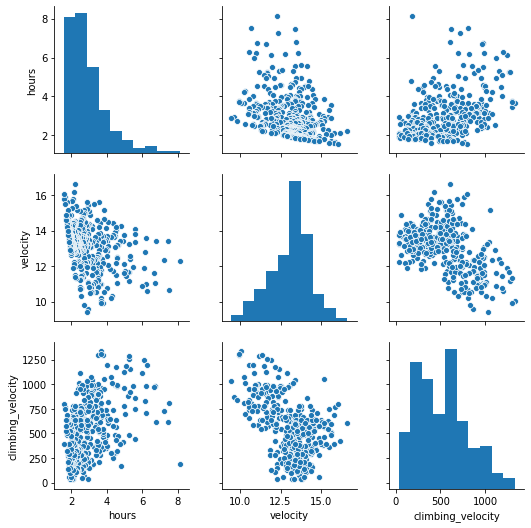

In [0]:
# Let's handroll some more useful features
df['velocity'] = df['miles'] / df['hours']
df['climbing_velocity'] = df['feet_climbed'] / df['hours']
df.drop(['feet_climbed', 'miles'],axis=1, inplace=True)

# Let's see how the data are distributed
sns.pairplot(df)

In [0]:
## *Discuss with the interviewer which rides seem suspicious based on inspecting the data*

In [0]:
# Let's build  a more complete feature matrix that includes our text data, relative dates, and features shown above
relative_dates = (df.date - df.date[0]).values / np.timedelta64(1,"D")
X = np.hstack((
    df[['climbing_velocity','hours','velocity']].values, 
    relative_dates[:,np.newaxis], 
    title_features))
X.shape

(433, 271)

In [0]:
## *Discuss with the inteverviewer how to derive anomaly scores for all the rides, now that you have 271 features in your feature matrix. Please discuss the role of a dimensionality reduction techniques

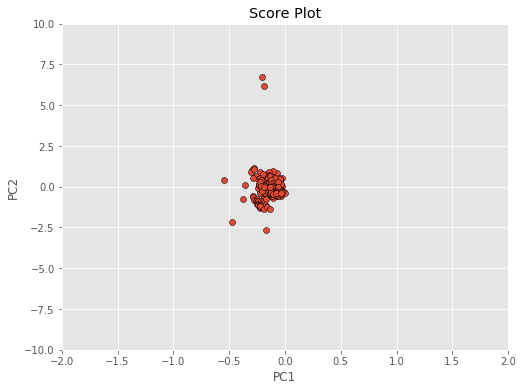

In [0]:
# Please reduce the dimensionality of the data to 2 dimensions and build an anomaly scoring algorithm. Identify the 4 most anomalous
# rides.

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Define the PCA object
pca = PCA()
 
# Run PCA on scaled data and obtain the scores array
T = pca.fit_transform(StandardScaler().fit_transform(X))


# Score plot of the first 2 PC
fig = plt.figure(figsize=(8,6))
with plt.style.context(('ggplot')):
    plt.scatter(T[:, 0], T[:, 1], edgecolors='k', cmap='jet')
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.title('Score Plot')
    plt.xlim((-2,2))
    plt.ylim((-10,10))
plt.show()

# We simply compute the Euclidean distance of each point from the origin, since we've already standardized the data

anomaly_scores = (T[:, 0]**2+T[:, 1]**2)**0.5

In [0]:
# Which of Peter's 4 rides are the most suspicious? Please compare the rides' titles to those we tallied earlier
suspicious_rides_idxs = np.argsort(np.abs(anomaly_scores))[-4:]

print(df.iloc[suspicious_rides_idxs])

        hours       date                                           title  \
11   6.131944 2015-10-14                                   Half Moon Bay   
5    7.510556 2016-10-01                 Half Moon Bay overnight campout   
10   6.737222 2016-08-12  Half Moon Bay / Harvey's 73/7300 Birthday Ride   
365  2.016944 2014-12-13     Westridge (up the back way; after the rain)   

      velocity  climbing_velocity  
11   11.899977        1246.586636  
5    10.660996         804.068348  
10   11.035705         981.116517  
365  13.064316         741.220218  


In [0]:
# Generate some diagnostic plots and show where in the distributions your anomalies lie.
df.loc[:,'anomaly_flag'] = anomaly_scores > 6.7

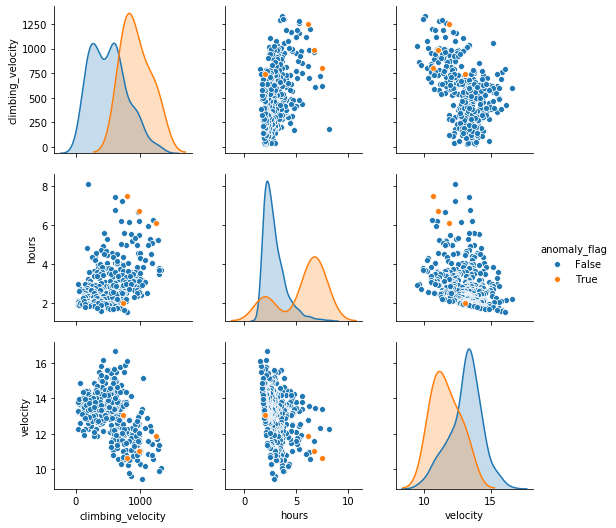

In [0]:
sns.pairplot(df[['climbing_velocity','hours','velocity','anomaly_flag']], 
             x_vars=['climbing_velocity','hours','velocity',],
             y_vars=['climbing_velocity','hours','velocity',],
             hue="anomaly_flag")

In [0]:
## *Based on your inspection of the data, does it seem likey these 4 anomalous rides were powered by an electric motor? What other datasets could you join in or other analyses could you perform to be able to draw a stronger conclusion?*